Q1. Suppose you have a jar with 4 jelly beans: 2 are strawberry-flavored, 1 is blueberry-flavored, and 1 is cinnamon-flavored. You draw one jelly bean at random from the jar.

    a. What is the sample space for this experiment?

    b. We define event A as the jelly bean drawn is strawberry-flavored and event B as The jelly bean drawn is not cinnamon-flavored. What are the probabilities of events A and B?

    c. Are events A and B mutually exclusive? Why or why not?


In [1]:
def P(S, A): # A = event , S = sample space
    if set(A).issubset(set(S)): # set A is an event
        return len(A)/len(S)
    else:
        return 0

S={'strawberry', 'strawberry', 'blueberry', 'cinnamon'}
A={'strawberry', 'strawberry'}
B={'blueberry', 'strawberry', 'strawberry'}
print("P(A):" , P(S,A))
print("P(B):" , P(S,B))

P(A): 0.3333333333333333
P(B): 0.6666666666666666


 Q2. Previously, we defined a **Python function P** to compute the probability of an event using the naive definition of probability. Generalize that function to compute the probability of events when they are
 not all equally likely. Use this new function to compute the probability of events A and B from the previous exercise.

 Hint: you can pass a third argument with the probability of each event.

In [14]:
def P(E,S,prob):
  if set(E).issubset(set(S)):
    sum_prob=0
    for e in E:
      sum_prob+=prob[S.index(e)]
    return sum_prob
  else:
    return 0

# we define probability of strawberry =0.5 amd that of others=0.25
prob=[0.5,0.5,0.25,0.25]
S=['strawberry', 'strawberry', 'blueberry', 'cinnamon']
A={'strawberry', 'strawberry'}
B={'blueberry', 'strawberry', 'strawberry'}

print("Probability of Event A=",P(A,S,prob))
print("Probability of Event B=",P(B,S,prob))


Probability of Event A= 0.5
Probability of Event B= 0.75


In [3]:
!pip install preliz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 496.4/496.4 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 MB 15.8 MB/s eta 0:00:00
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.41.1
    Uninstalling llvmlite-0.41.1:
      Successfully uninstalled llvmlite-0.41.1
  Attempting uninstall: numba
    Found existing installation: numba 0.58.1
    Uninstalling numba-0.58.1:
      Successfully uninstalled numba-0.58.1


Q3.  Use PreliZ to explore different parameters for the Gaussian distributions. Use the methods `plot_pdf`, `plot_cdf`, and `plot_interactive`. We discussed the probability mass/density functions and the cumulative density function. But there are other ways to represent functions like the percentile point function ppf. Using the `plot_ppf` method of PreliZ, plot the percentile point function for the BetaBinomial and Gaussian distributions. Can you explain how the ppf is related to the cdf and pmf/pdf?

[None, None, None]

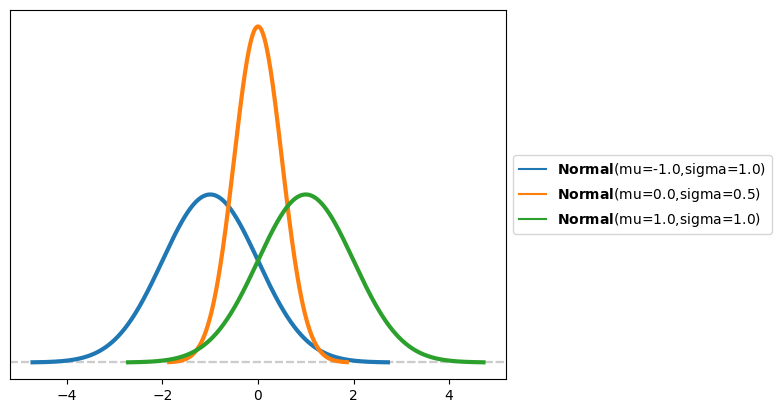

In [4]:
# Import necessary libraries
import arviz as az  # For Bayesian data analysis and visualization
import matplotlib.pyplot as plt  # For plotting
import numpy as np  # For numerical operations
from scipy.special import binom, beta  # For binomial and beta distributions
import preliz as pz # defining priors
from cycler import cycler
import math

mus = [-1, 0, 1]
sigmas = [1, 0.5, 1]
for mu, sigma in zip(mus, sigmas):
    ax = pz.Normal(mu, sigma).plot_pdf()

[line.set_linewidth(3.) for line in ax.get_lines()[1::2]]


[None]

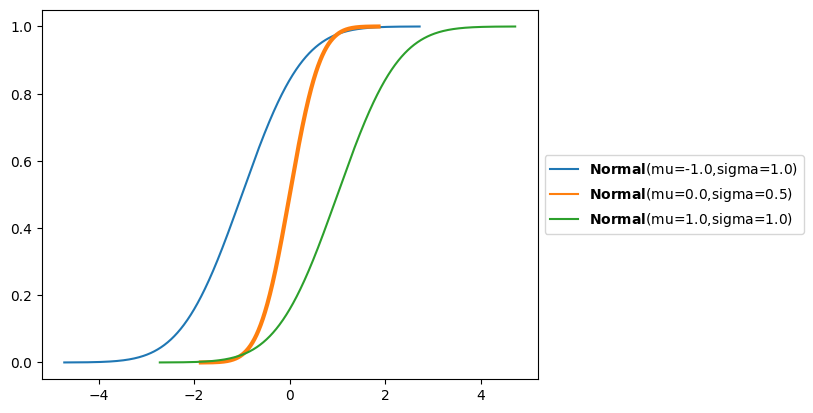

In [5]:
mus = [-1, 0, 1]
sigmas = [1, 0.5, 1]
for mu, sigma in zip(mus, sigmas):
    ax = pz.Normal(mu, sigma).plot_cdf()

[line.set_linewidth(3.) for line in ax.get_lines()[1::2]]

interactive(children=(FloatSlider(value=1.0, description='mu (-inf, inf)', max=11.0, min=-9.0, style=SliderSty…

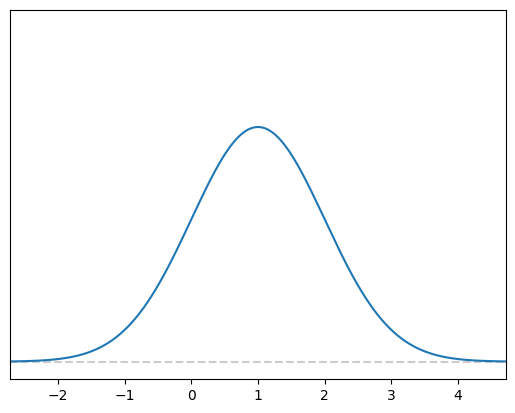

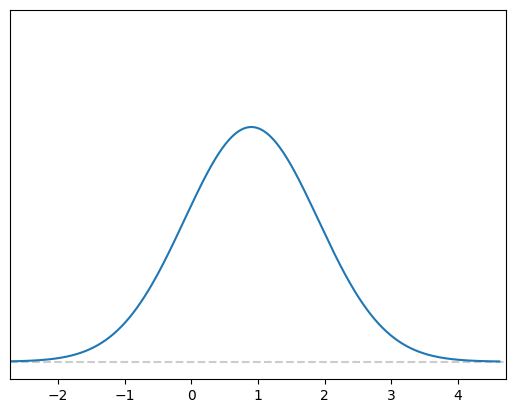

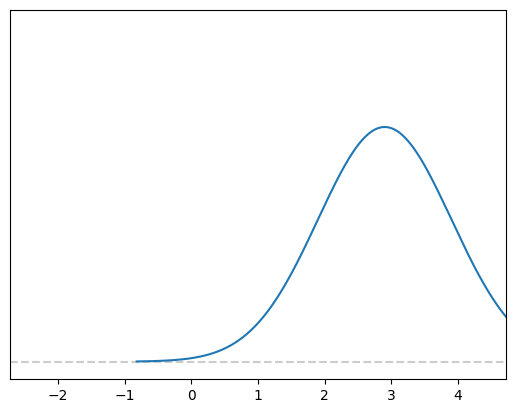

In [6]:
for mu, sigma in zip(mus, sigmas):
    ax = pz.Normal(mu, sigma).plot_interactive(pointinterval=False)

ax

By careful observation of the graphs obtained, we can infere that Percentile Point function is the inverse of CDF or Cumulative Distribution Function. It maps its input probability p to a threshold value x so that the probability of random variable X being less or equal than x is p.



Q4. Use PreliZ to compute the moments for the SkewNormal distribution for a different combination of parameters. Generate random samples of different sizes,
like 10, 100, and 1,000, and see if you can recover the values of the first two moments (mean and variance) from the samples. Report your obervations.

In [12]:
import preliz
import numpy as np

def moments(p1, p2, p3, params, n):
  sn = preliz.SkewNormal(p1, p2, p3)
  print(f"Moments for SkewNormal{params}:{sn.moments()}")
  samples_sn_n = sn.rvs(n)
  # Calculate the sample mean and variance for each sample
  sample_mean = np.mean(samples_sn_n)
  sample_var = np.var(samples_sn_n)
  # Print the sample moments
  print(f"Sample moments for SkewNormal{params} with n = {n}")
  return sample_mean, sample_var

params = [(10, 0.2, 1), (-5, 0.5, 0), (0, -0.5, 3)]
nums = [10, 100, 1000]
for p in params:
  for n in nums:
    sample_mean, sample_var = moments(p[0], p[1], p[2], p, n)
    print("Mean:", sample_mean)
    print("Variance:", sample_var,"\n")

Moments for SkewNormal(10, 0.2, 1):[10.112837916709552, 0.02726760455264838, 0.13694876731165254, 0.0617443154193264]
Sample moments for SkewNormal(10, 0.2, 1) with n = 10
Mean: 10.130543989336415
Variance: 0.013139575837178102 

Moments for SkewNormal(10, 0.2, 1):[10.112837916709552, 0.02726760455264838, 0.13694876731165254, 0.0617443154193264]
Sample moments for SkewNormal(10, 0.2, 1) with n = 100
Mean: 10.10803632849064
Variance: 0.025420011393601 

Moments for SkewNormal(10, 0.2, 1):[10.112837916709552, 0.02726760455264838, 0.13694876731165254, 0.0617443154193264]
Sample moments for SkewNormal(10, 0.2, 1) with n = 1000
Mean: 10.117615948724172
Variance: 0.02683356152615089 

Moments for SkewNormal(-5, 0.5, 0):[-5.0, 0.25, 0.0, 0.0]
Sample moments for SkewNormal(-5, 0.5, 0) with n = 10
Mean: -5.107256367321325
Variance: 0.1265042189560801 

Moments for SkewNormal(-5, 0.5, 0):[-5.0, 0.25, 0.0, 0.0]
Sample moments for SkewNormal(-5, 0.5, 0) with n = 100
Mean: -4.9973669060862225
Varia